# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [5]:
pip install citipy

     -------------------------------------- 557.7/557.7 kB 8.7 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for citipy: filename=citipy-0.0.5-py3-none-any.whl size=559686 sha256=5e3b21ba379b072f28807f342c344238772119249f4048cf4a7502ab2bfbe78d
  Stored in directory: c:\users\lilmz\appdata\local\pip\cache\wheels\d9\dd\68\8cc0be16282b0fcae5acb7280b47d31952f203c401923a8c1e
Successfully built citipy
Note: you may need to restart the kernel to use updated packages.


In [113]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [114]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 635


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [115]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | punta arenas
Processing Record 3 of Set 1 | busselton
Processing Record 4 of Set 1 | dikson
Processing Record 5 of Set 1 | faanui
Processing Record 6 of Set 1 | butaritari
Processing Record 7 of Set 1 | kapaa
Processing Record 8 of Set 1 | karsun
Processing Record 9 of Set 1 | auki
Processing Record 10 of Set 1 | klaksvik
Processing Record 11 of Set 1 | avarua
Processing Record 12 of Set 1 | khatanga
Processing Record 13 of Set 1 | hithadhoo
Processing Record 14 of Set 1 | sorvag
City not found. Skipping...
Processing Record 15 of Set 1 | jamestown
Processing Record 16 of Set 1 | wageningen
Processing Record 17 of Set 1 | cape town
Processing Record 18 of Set 1 | cidreira
Processing Record 19 of Set 1 | vaini
Processing Record 20 of Set 1 | geraldton
Processing Record 21 of Set 1 | caravelas
Processing Record 22 of Set 1 | ancud
Processing Record 23 of Set 1

City not found. Skipping...
Processing Record 39 of Set 4 | alice springs
Processing Record 40 of Set 4 | harper
Processing Record 41 of Set 4 | niquelandia
Processing Record 42 of Set 4 | ambodifototra
City not found. Skipping...
Processing Record 43 of Set 4 | tura
Processing Record 44 of Set 4 | bagnes
Processing Record 45 of Set 4 | omboue
Processing Record 46 of Set 4 | blonduos
City not found. Skipping...
Processing Record 47 of Set 4 | ilesha
Processing Record 48 of Set 4 | prachuap khiri khan
Processing Record 49 of Set 4 | isangel
Processing Record 0 of Set 5 | ouegoa
Processing Record 1 of Set 5 | bambanglipuro
Processing Record 2 of Set 5 | mombasa
Processing Record 3 of Set 5 | northam
Processing Record 4 of Set 5 | castro
Processing Record 5 of Set 5 | segovia
Processing Record 6 of Set 5 | lagoa
Processing Record 7 of Set 5 | yatou
Processing Record 8 of Set 5 | samusu
City not found. Skipping...
Processing Record 9 of Set 5 | troitsko-pechorsk
Processing Record 10 of Set

Processing Record 29 of Set 8 | luwuk
Processing Record 30 of Set 8 | portland
Processing Record 31 of Set 8 | filadelfia
Processing Record 32 of Set 8 | loveland
Processing Record 33 of Set 8 | miraflores
Processing Record 34 of Set 8 | bundaberg
Processing Record 35 of Set 8 | lubango
Processing Record 36 of Set 8 | bethel
Processing Record 37 of Set 8 | zhigansk
Processing Record 38 of Set 8 | manggar
Processing Record 39 of Set 8 | itarema
Processing Record 40 of Set 8 | santa lucia
Processing Record 41 of Set 8 | tokur
Processing Record 42 of Set 8 | ayan
Processing Record 43 of Set 8 | altay
Processing Record 44 of Set 8 | pecos
Processing Record 45 of Set 8 | goma
Processing Record 46 of Set 8 | kikwit
Processing Record 47 of Set 8 | celestun
Processing Record 48 of Set 8 | kaitangata
Processing Record 49 of Set 8 | varberg
Processing Record 0 of Set 9 | borgarnes
Processing Record 1 of Set 9 | long beach
Processing Record 2 of Set 9 | luderitz
Processing Record 3 of Set 9 | mla

City not found. Skipping...
Processing Record 16 of Set 12 | belyy yar
Processing Record 17 of Set 12 | tucuman
Processing Record 18 of Set 12 | marzuq
Processing Record 19 of Set 12 | manaus
Processing Record 20 of Set 12 | amberley
Processing Record 21 of Set 12 | euclides da cunha
Processing Record 22 of Set 12 | makokou
Processing Record 23 of Set 12 | derzhavinsk
Processing Record 24 of Set 12 | almaznyy
Processing Record 25 of Set 12 | port hedland
Processing Record 26 of Set 12 | ponoka
Processing Record 27 of Set 12 | bestobe
Processing Record 28 of Set 12 | dudinka
Processing Record 29 of Set 12 | thinadhoo
Processing Record 30 of Set 12 | chokurdakh
Processing Record 31 of Set 12 | sivaki
Processing Record 32 of Set 12 | rolim de moura
City not found. Skipping...
Processing Record 33 of Set 12 | seabra
Processing Record 34 of Set 12 | sao mateus
Processing Record 35 of Set 12 | emerald
Processing Record 36 of Set 12 | zhuozhou
City not found. Skipping...
Processing Record 37 

In [116]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df=pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          582
Lat           582
Lng           582
Max Temp      582
Humidity      582
Cloudiness    582
Wind Speed    582
Country       582
Date          582
dtype: int64

In [117]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ushuaia,-54.8000,-68.3000,2.81,70,75,8.75,AR,1680130241
1,punta arenas,-53.1500,-70.9167,5.06,56,40,4.12,CL,1680130283
2,busselton,-33.6500,115.3333,15.65,73,94,6.57,AU,1680130283
3,dikson,73.5069,80.5464,-20.06,98,100,5.67,RU,1680130283
4,faanui,-16.4833,-151.7500,28.01,73,93,3.91,PF,1680130283


In [118]:
# Export the City_Data into a csv
city_data_df.to_csv("cities.csv", index_label="City_ID")

In [119]:
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ushuaia,-54.8000,-68.3000,2.81,70,75,8.75,AR,1680130241
1,punta arenas,-53.1500,-70.9167,5.06,56,40,4.12,CL,1680130283
2,busselton,-33.6500,115.3333,15.65,73,94,6.57,AU,1680130283
3,dikson,73.5069,80.5464,-20.06,98,100,5.67,RU,1680130283
4,faanui,-16.4833,-151.7500,28.01,73,93,3.91,PF,1680130283


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

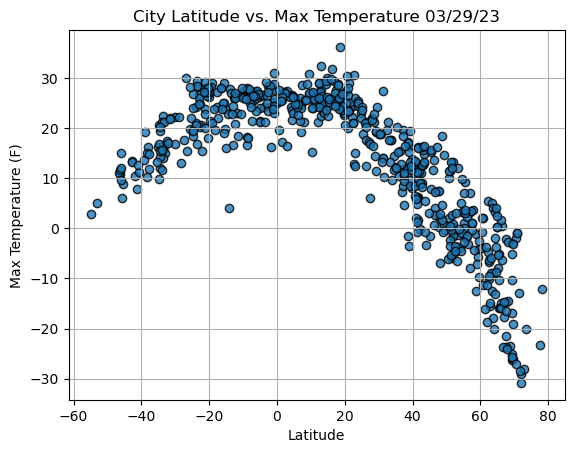

In [120]:
# Build scatter plot for latitude vs. temperature
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

plt.scatter(lats,  # sets x_axis
            max_temps,  # sets y_axis
            edgecolor="black", linewidths=1, marker="o",  # describes line
            alpha=0.8, label="Cities") # more description

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

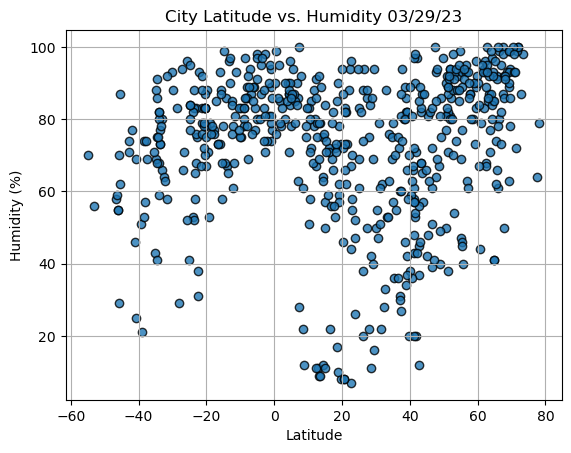

In [121]:
# Scatter plot for latitude vs. Humidity. 6.3.2
plt.scatter(lats,  # sets x_axis
            humidity,  # sets y_axis
            edgecolor="black", linewidths=1, marker="o",  # describes line
            alpha=0.8, label="Cities") # more description

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

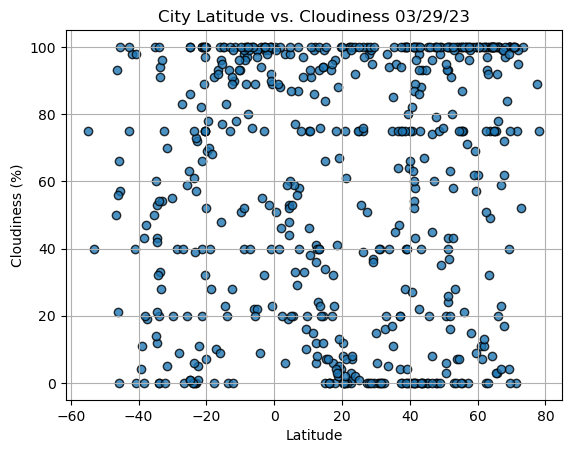

In [122]:
# Scatter plot for latitude vs. Cloudiness. 6.3.3
plt.scatter(lats,  # sets x_axis
            cloudiness,  # sets y_axis
            edgecolor="black", linewidths=1, marker="o",  # describes line
            alpha=0.8, label="Cities") # more description

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

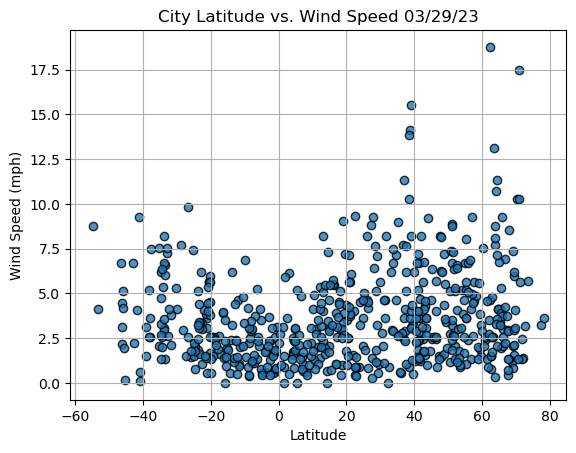

In [123]:
# Scatter plot for latitude vs. Wind Speed. 6.3.4
plt.scatter(lats,  # sets x_axis
            wind_speed,  # sets y_axis
            edgecolor="black", linewidths=1, marker="o",  # describes line
            alpha=0.8, label="Cities") # more description

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [130]:
# Define a function to create Linear Regression plots
from scipy.stats import linregress


In [131]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,dikson,73.5069,80.5464,-20.06,98,100,5.67,RU,1680130283
5,butaritari,3.0707,172.7902,27.44,80,98,6.15,KI,1680130284
6,kapaa,22.0752,-159.3190,22.18,88,100,1.54,US,1680130284
7,karsun,54.1994,46.9827,4.97,92,100,5.21,RU,1680130284
9,klaksvik,62.2266,-6.5890,5.51,96,100,18.77,FO,1680130284


In [132]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ushuaia,-54.8000,-68.3000,2.81,70,75,8.75,AR,1680130241
1,punta arenas,-53.1500,-70.9167,5.06,56,40,4.12,CL,1680130283
2,busselton,-33.6500,115.3333,15.65,73,94,6.57,AU,1680130283
4,faanui,-16.4833,-151.7500,28.01,73,93,3.91,PF,1680130283
8,auki,-8.7676,160.7034,27.59,80,98,2.22,SB,1680130284


###  Temperature vs. Latitude Linear Regression Plot

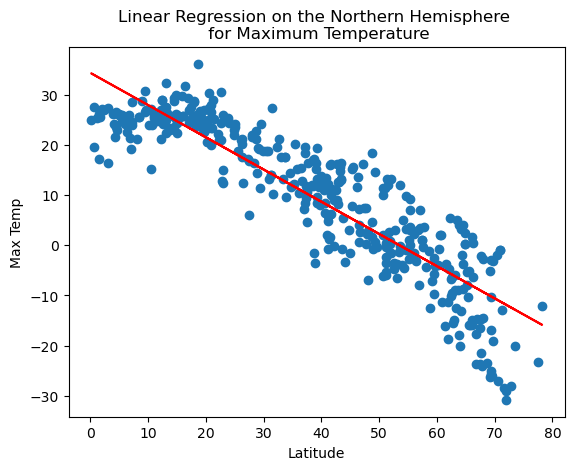

In [136]:
# Linear regression on Northern Hemisphere
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
   
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show() 
## Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature',
                       'Max Temp',(10,40))

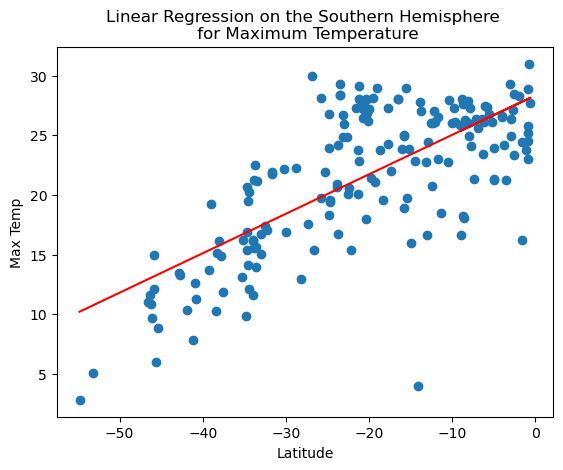

In [137]:
# Linear regression on Southern Hemisphere
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature',
                       'Max Temp',(-50,90))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

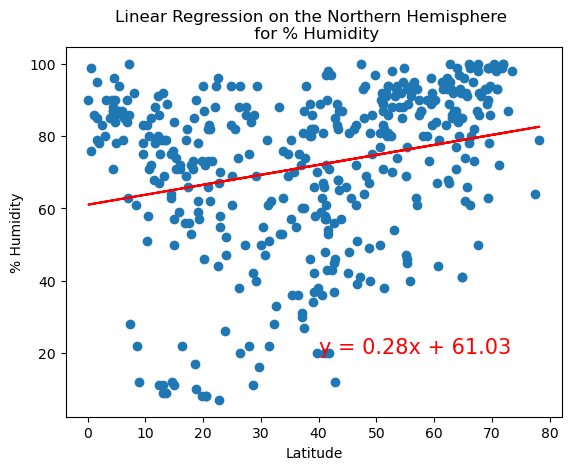

In [138]:
## 6.4.3 Linear Regression on the Percent Humidity for Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       "Linear Regression on the Northern Hemisphere \n for % Humidity",
                       "% Humidity",(40,20))

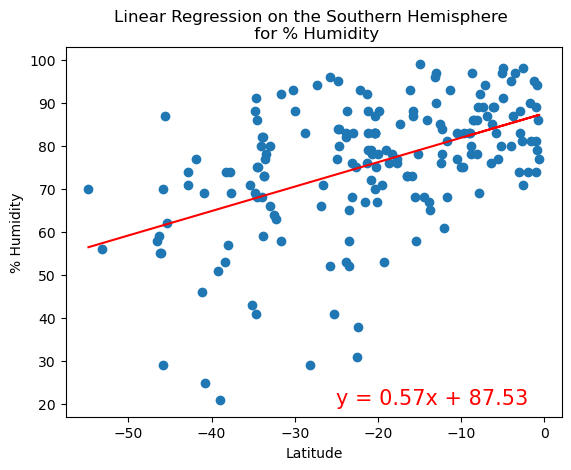

In [139]:
## 6.4.3 Linear Regression on the Percent Humidity for Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       "Linear Regression on the Southern Hemisphere \n for % Humidity",
                       "% Humidity",(-25,20))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

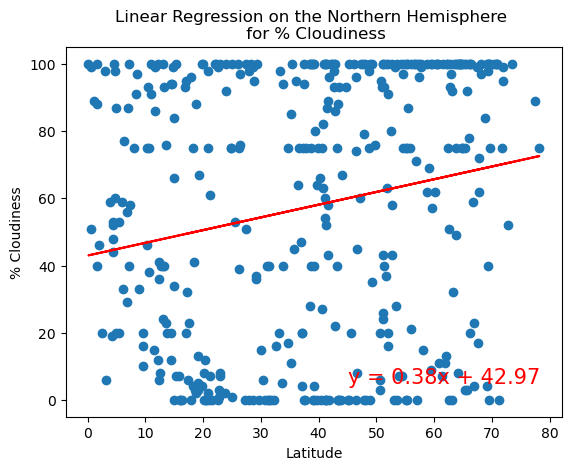

In [141]:
## 6.4.4  Linear Regression on the Percent Cloudines for Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       "Linear Regression on the Northern Hemisphere \n for % Cloudiness",
                       "% Cloudiness",(45,5))

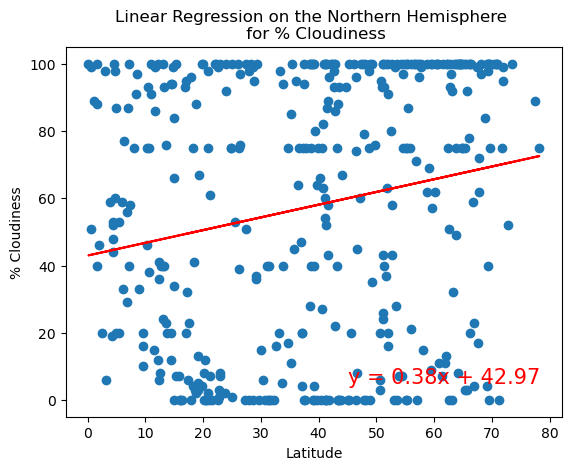

In [142]:
## 6.4.4  Linear Regression on the Percent Cloudines for Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       "Linear Regression on the Northern Hemisphere \n for % Cloudiness",
                       "% Cloudiness",(45,5))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

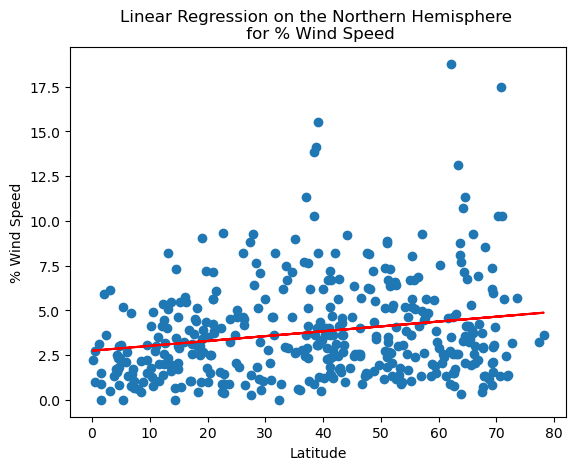

In [143]:
## 6.4.5  Linear Regression on  Wind Speed for Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       "Linear Regression on the Northern Hemisphere \n for % Wind Speed",
                       "% Wind Speed",(10,40))

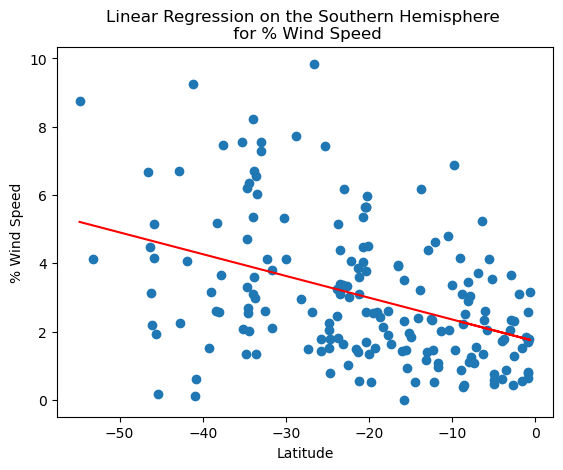

In [144]:
## 6.4.5  Linear Regression on  Wind Speed for Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       "Linear Regression on the Southern Hemisphere \n for % Wind Speed",
                       "% Wind Speed",(-50,20))

**Discussion about the linear relationship:** YOUR RESPONSE HERE